In [21]:
import pandas as pd
# from google.colab import files
# files.upload()
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
from sklearn.preprocessing import KBinsDiscretizer
kbd_uniform = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
kbd_quartile = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quartile')

kbd_kmeans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='k-means')

In [24]:
df = df[['Age','Fare','Survived']]
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Survived',axis = 1),df['Survived'],train_size= 0.7,random_state = True)
x_train

,Age,Fare
114,17.000000,14.4583
874,28.000000,24.0000
76,29.699118,7.8958
876,20.000000,9.8458
674,29.699118,0.0000
...,...,...
715,19.000000,7.6500
767,30.500000,7.7500
72,21.000000,73.5000
235,29.699118,7.5500


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   Survived  891 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [29]:
df.fillna(df['Age'].mean(),inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Fare      891 non-null    float64
 2   Survived  891 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


<Axes: xlabel='Age', ylabel='Density'>

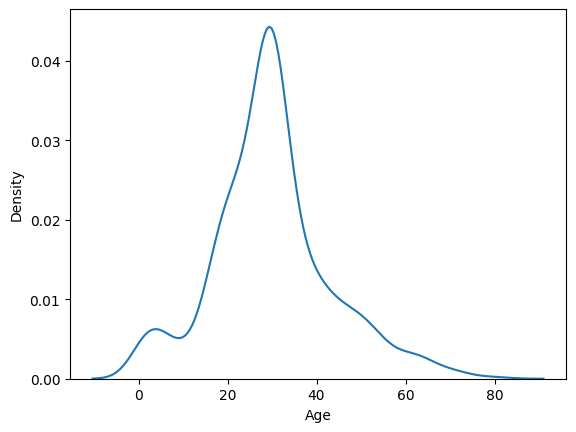

In [32]:
import seaborn as sns
sns.kdeplot(x_train['Age'])

In [35]:
kbd_uniform.fit(x_train)
X_train = kbd_uniform.transform(x_train)


In [38]:
X_train

array([[2., 0.],
       [3., 0.],
       [3., 0.],
       ...,
       [2., 1.],
       [3., 0.],
       [2., 0.]])